# Comparative Analysis of Machine Learning Models for Credit Card Fraud Detection


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [17]:
credit_card_data = pd.read_csv(r"C:\Users\KIIT\OneDrive\Desktop\shit\ds projects\creditcard.csv",encoding="latin-1") 

In [18]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [19]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [20]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [21]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [22]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [23]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [24]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [25]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [26]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [27]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Text(0, 0.5, 'Frequency')

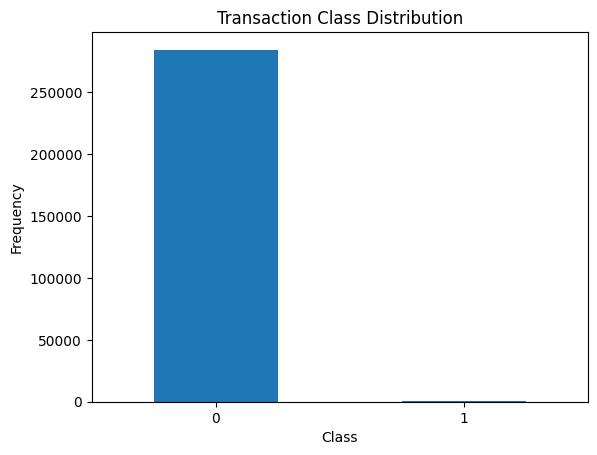

In [12]:
import matplotlib.pyplot as plt
count_classes = pd.value_counts(data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2))

plt.xlabel("Class")

plt.ylabel("Frequency")

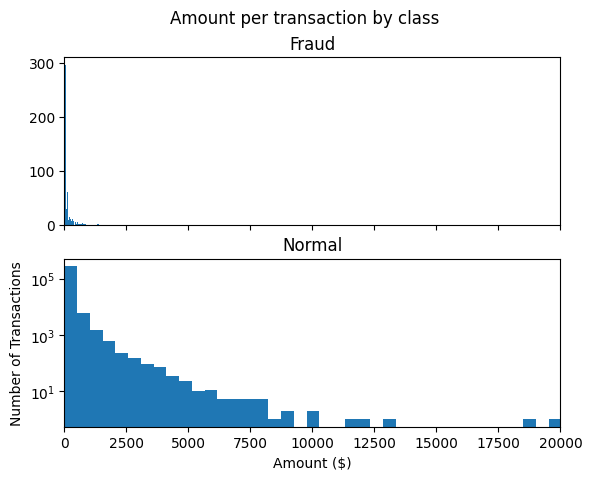

In [28]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(valid.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

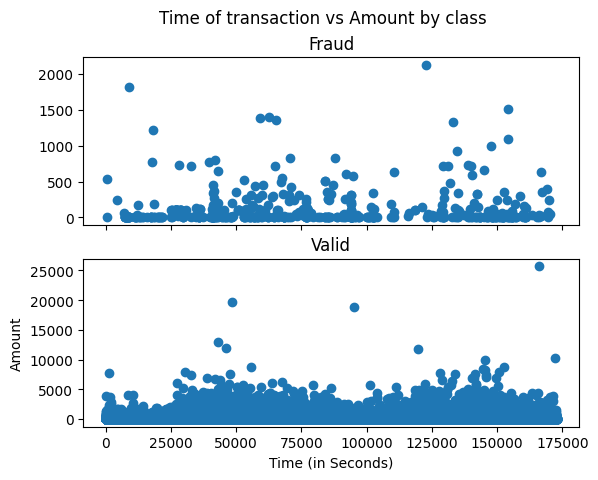

In [13]:
# We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(valid.Time, valid.Amount)
ax2.set_title('Valid')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

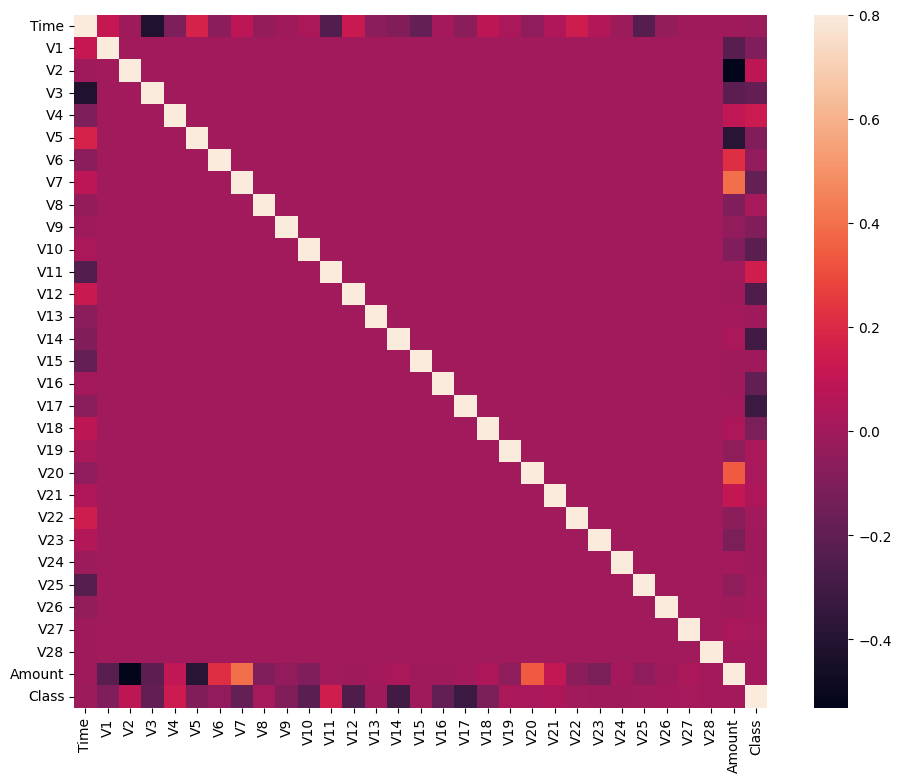

In [29]:
# Correlation matrix 
import seaborn as sns
corrmat = data.corr() 
fig = plt.figure(figsize = (12, 9)) 
sns.heatmap(corrmat, vmax = .8, square = True) 
plt.show() 

In [30]:
legit_sample = legit.sample(n=492)

In [31]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [32]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
227559,145122.0,2.203804,-0.699965,-1.441256,-0.869637,-0.613052,-1.594470,-0.171862,-0.407084,-0.515469,...,0.045387,-0.005785,0.218530,0.012981,-0.112867,-0.314628,-0.058436,-0.062183,27.00,0
52989,45756.0,-1.648654,-0.124834,0.818048,-0.020789,-0.261412,1.744391,0.515790,0.175225,0.676692,...,0.063626,0.972353,0.579823,-0.875565,-1.222381,0.840308,-0.388943,0.302309,158.10,0
56535,47475.0,-2.584537,-1.620530,1.888585,-0.506851,0.755497,0.621295,-1.152049,1.240428,0.515897,...,0.223282,0.076936,0.220643,-0.574479,-0.490705,0.872253,-0.024534,-0.258102,74.00,0
155940,106846.0,-0.654749,0.826691,2.403484,-0.218120,0.030230,-0.059914,0.443606,-0.156873,1.376684,...,-0.242471,-0.338151,-0.299425,-0.036945,0.195670,-0.764616,-0.218331,-0.155600,11.27,0
213293,139195.0,-1.139987,0.340962,-0.742563,1.171070,-0.251967,-0.290639,1.748086,0.306543,-0.901334,...,0.382072,0.582492,0.471439,-0.052345,0.060083,-0.400263,0.200347,0.155081,302.50,0


In [33]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [34]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [35]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94058.951220,-0.052320,-0.085204,0.030223,-0.021617,-0.029443,0.053839,-0.000999,-0.024894,-0.004820,...,0.028298,0.019668,-0.036834,0.010344,0.012132,0.015760,-0.025364,0.015306,-0.008043,103.730224
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [36]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [37]:
print(X)

            Time        V1        V2        V3        V4        V5        V6   
227559  145122.0  2.203804 -0.699965 -1.441256 -0.869637 -0.613052 -1.594470  \
52989    45756.0 -1.648654 -0.124834  0.818048 -0.020789 -0.261412  1.744391   
56535    47475.0 -2.584537 -1.620530  1.888585 -0.506851  0.755497  0.621295   
155940  106846.0 -0.654749  0.826691  2.403484 -0.218120  0.030230 -0.059914   
213293  139195.0 -1.139987  0.340962 -0.742563  1.171070 -0.251967 -0.290639   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [38]:
print(Y)

227559    0
52989     0
56535     0
155940    0
213293    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [40]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have your data loaded into X and Y variables

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),  # Increase max_iter to avoid convergence warning
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, Y_train)
    Y_pred = model.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)
    print("\n \n")
    print(f'{name}:')
    print(f'  Accuracy: {accuracy}')
    print(f'  Precision: {precision}')
    print(f'  Recall: {recall}')
    print(f'  F1 Score: {f1}')

    # Create confusion matrix
    cm = confusion_matrix(Y_test, Y_pred)
    print(f'  Confusion Matrix:\n{cm}')



 

Logistic Regression:
  Accuracy: 0.9289340101522843
  Precision: 0.9666666666666667
  Recall: 0.8877551020408163
  F1 Score: 0.9255319148936171
  Confusion Matrix:
[[96  3]
 [11 87]]

 

Decision Tree:
  Accuracy: 0.8934010152284264
  Precision: 0.9139784946236559
  Recall: 0.8673469387755102
  F1 Score: 0.8900523560209423
  Confusion Matrix:
[[91  8]
 [13 85]]

 

Random Forest:
  Accuracy: 0.9238578680203046
  Precision: 0.9770114942528736
  Recall: 0.8673469387755102
  F1 Score: 0.9189189189189189
  Confusion Matrix:
[[97  2]
 [13 85]]

 

SVM:
  Accuracy: 0.9289340101522843
  Precision: 0.9772727272727273
  Recall: 0.8775510204081632
  F1 Score: 0.9247311827956989
  Confusion Matrix:
[[97  2]
 [12 86]]


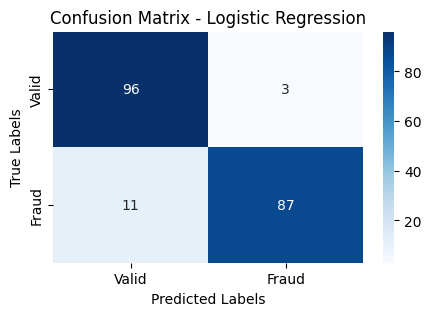

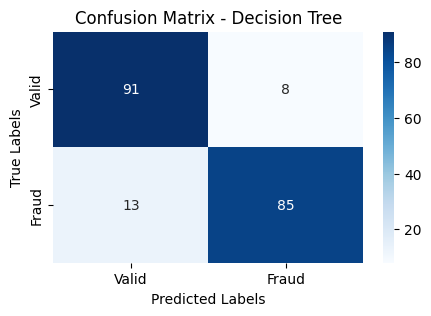

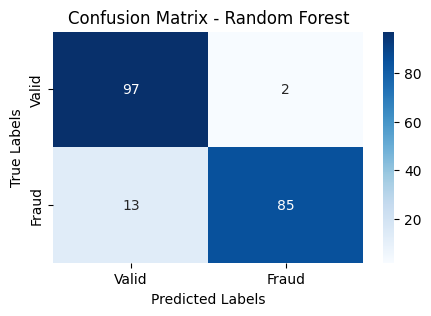

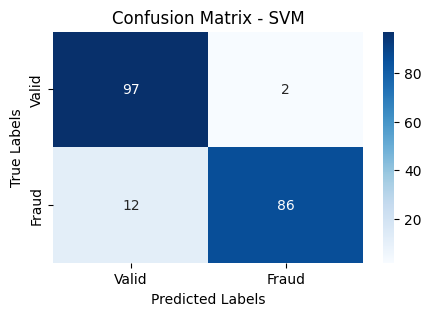

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, labels, model_name):
    plt.figure(figsize=(5, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Assuming you have the trained models stored in the `models` dictionary
# and you have the test data stored in the variables `X_test_scaled` and `Y_test`

# Iterate over each model and generate confusion matrix
for name, model in models.items():
    Y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(Y_test, Y_pred)
    plot_confusion_matrix(cm, labels=['Valid', 'Fraud'], model_name=name)
